# Random Forest Intution

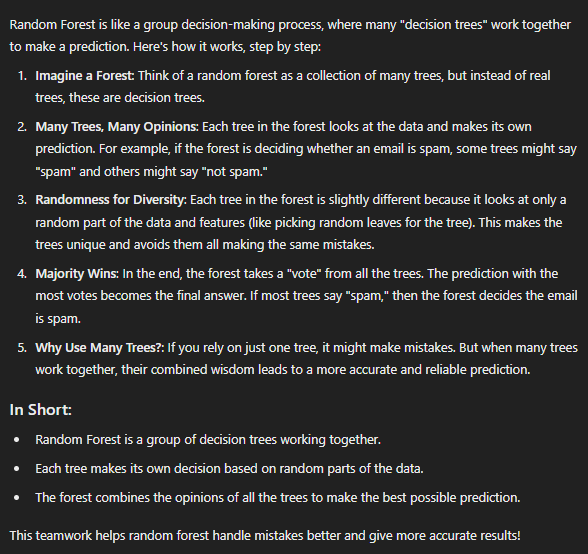

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.695613,1.753967,1.010194,0.533392,-1.498874,0
1,0.557479,1.608796,1.235575,1.085518,-1.425877,0
2,1.495944,1.794520,1.292891,2.416438,-2.317824,0
3,1.663708,1.545350,1.035815,1.691192,-2.010420,0
4,0.071937,-0.095929,0.711128,0.437147,1.819792,1


### Function
- row sampling
- col sampling

In [ ]:
# row sampling
def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# function for Col sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
df1 = sample_rows(df,0.2) # number of rows selected in a dataset
df2 = sample_rows(df,0.2) # number of rows selected in a dataset
df3 = sample_rows(df,0.2) # number of rows selected in a dataset
df1

,col1,col2,col3,col4,col5,target
32,0.712452,1.689239,1.274591,1.743934,-2.024208,0
36,1.708707,1.710526,1.245603,2.655944,-2.322879,0
84,0.173063,0.120929,0.921457,0.982600,0.038237,0
76,-2.710835,-1.648392,3.800189,-0.123833,0.245693,1
22,-0.682123,-0.599613,0.063470,0.035457,2.453464,1
96,1.546600,1.154508,0.998701,1.445994,-0.867067,0
78,0.794704,1.412724,1.401233,2.428891,-2.055795,0
40,2.677234,1.915251,0.780604,1.294845,-0.478357,0
14,-0.343207,-0.095708,0.965389,0.790351,-0.983400,0
34,1.780272,1.144988,1.142344,3.517563,-2.498428,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.44\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.505\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

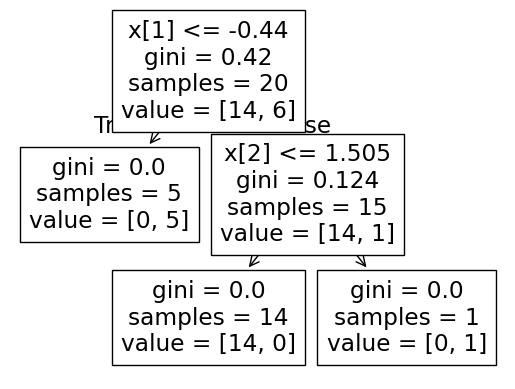

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.22\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= -0.595\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

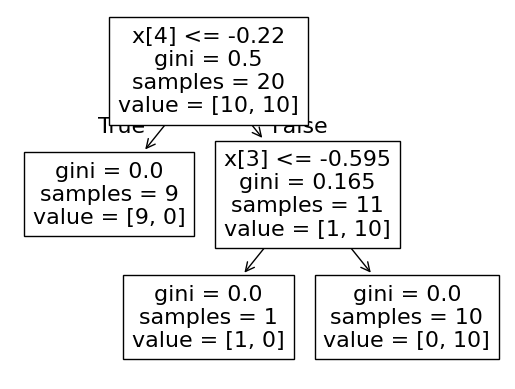

In [ ]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.335\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= -1.231\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

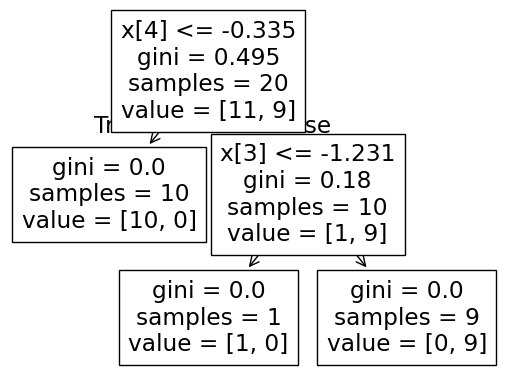

In [ ]:
plot_tree(clf3)



### Classification -> Majority Counts

### Regression -> Mean

In [ ]:
winner = []

In [ ]:
(clf1.predict(np.array([1.695613,	1.753967,	1.010194,	0.533392	,-1.498874	]).reshape(1,5)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
(clf2.predict(np.array([1.695613,	1.753967	,1.010194,	0.533392,	-1.498874	]).reshape(1,5)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([1.695613,	1.753967	,1.010194,	0.533392,	-1.498874]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Not worknig
# # Created a dictionary for representing the counts

# dit = {}
# for i in range(len(winner)):
#   if winner[0][0] not in dit:
#     dit[winner[0][0]] = winner[0][0]
#   else:
#     dit[winner[0][0]] += 1

# print(dit)

{0: 4}
